# RECIPE SITE TRAFFICK

## task list

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake


In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Read in dataset
data = pd.read_csv('recipe_site_traffic_2212.csv')
#make a copy of data
data_c = data.copy()
#glance of data
data_c.head()


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


**DATA VALIDATION: validating and cleaning each column**

In [4]:
# inspect the dataset
data_c.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


Comparing the information above with the information given about the dataset, we see that the last three columns('category','servings','high_traffick') do not correspond. We therefore need to change the datatype to the appropriate type.

In [5]:
#change 'category' column datatype to category
data_c['category'] =data_c['category'].astype('category')
#change 'high_traffic' column datatype to category
data_c['high_traffic'] = data_c['high_traffic'].astype('category')

# The servings column requires more manipulation to facilitate conversion since it contains strings in some values. I used the unique() method to figure out this problem.

data_c['servings'] = data_c['servings'].str.extract('(\d+)')
# conversion 

data_c['servings'] = data_c['servings'].astype('int')


#confirm changes
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  574 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 46.9 KB


Now all the columns have the right datatype.

From the result of the info() method, it's clear we have missing/null values in the columns; we fix this next.

In [6]:
data_c.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,895.000000,895.000000,895.000000,895.000000,947.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296,3.477297
std,273.519652,453.020997,43.949032,14.679176,36.369739,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,474.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,710.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


For columns where the null value is less than 5% of the dataset size; values will be dropped, otherwise, imputation will be done.

In [7]:
data_c.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [8]:
#function to automatically check if missing value is less than 5% of dataset
def detect_size(data):
    data_len, _ = data_c.shape
    for column in data.columns:
        if data[column].dtype != 'category':
            if data[column].isnull().sum() < (0.05*data_len):
                data[column].dropna(inplace = True)
            else:
                data[column].fillna(data[column].mean(), inplace = True)
        

In [9]:
#apply function to the dataset
detect_size(data_c)
# confirm changes
data_c.isna().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    373
dtype: int64

Looking at the category datatype columns:

In [10]:
data_c['category'].unique()

['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', ..., 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat', 'Dessert']
Length: 11
Categories (11, object): ['Beverages', 'Breakfast', 'Chicken', 'Chicken Breast', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']

That is not right, according to the information given about the columns, there should be only 10 not 11.
comparing the above result with given information on this column, it is clear 'Chicken Breast' is the problem.
We will add 'Chicken Breast' to 'Chicken'. It is afterall, of chicken category.

In [11]:
data_c['category'] = data_c['category'].replace('Chicken Breast', 'Chicken')
#confirm changes
data_c['category'].unique()

['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert']
Categories (10, object): ['Beverages', 'Breakfast', 'Chicken', 'Dessert', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']

In [12]:
#taking a closer look into the 'high_traffic' feature
data_c['high_traffic'].unique()

['High', NaN]
Categories (1, object): ['High']

we replace NaN with 'Low'. Since this is more logically and more readable.
From information given, only those that brought high traffic were label high, leaving NaN to be those that were of low traffic.

In [13]:
data_c.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,NaN
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,NaN


In [14]:
# replace NaN with Low
data_c['high_traffic'] =data_c['high_traffic'].astype('string')
data_c['high_traffic'] =data_c['high_traffic'].fillna('Low')
data_c['high_traffic'] =data_c['high_traffic'].astype('category')

# confirm changes
data_c['high_traffic'].unique()

['High', 'Low']
Categories (2, string): [High, Low]

In [15]:
data_c.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low


In [16]:
#checking the entire dataset again
data_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       947 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 46.9 KB


The dataset is now in the right and expected form for further analysis

# EXPLORATORY ANALYSIS: 

What type of recipe is the highest in our dataset? 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Breakfast'),
  Text(2, 0, 'Chicken'),
  Text(3, 0, 'Dessert'),
  Text(4, 0, 'Lunch/Snacks'),
  Text(5, 0, 'Meat'),
  Text(6, 0, 'One Dish Meal'),
  Text(7, 0, 'Pork'),
  Text(8, 0, 'Potato'),
  Text(9, 0, 'Vegetable')])

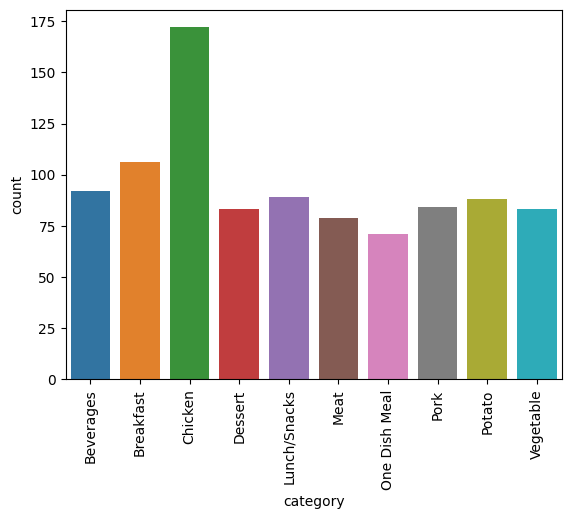

In [17]:
sns.countplot(x='category',data=data_c)
plt.xticks(rotation=90)

In [18]:
data_c.head(2)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High


which of the types of recipe contain the highest average calories?

<AxesSubplot: ylabel='calories'>

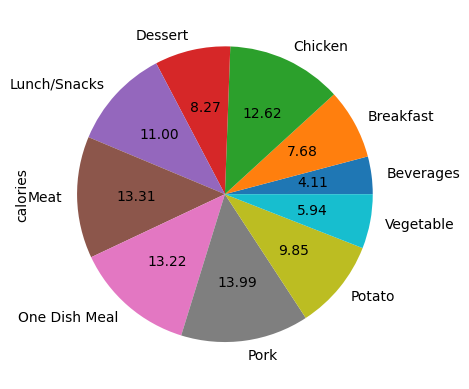

In [19]:
data_c.groupby('category')['calories'].mean().plot(kind='pie',autopct="%.2f",fontsize=10)


What is the distribution of recipe with protein?

<AxesSubplot: xlabel='protein', ylabel='Count'>

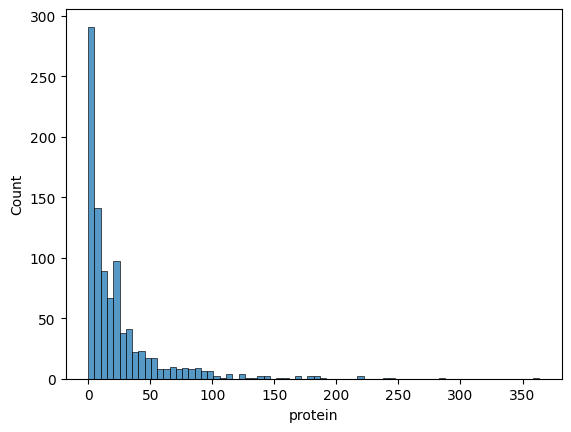

In [20]:
sns.histplot(x='protein',data=data_c)

<AxesSubplot: xlabel='carbohydrate', ylabel='Count'>

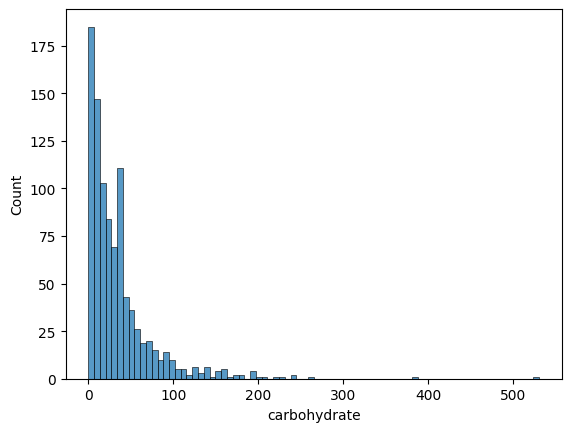

In [21]:
sns.histplot(x='carbohydrate',data=data_c)

What of the sugar content distribution?


<AxesSubplot: xlabel='sugar', ylabel='Count'>

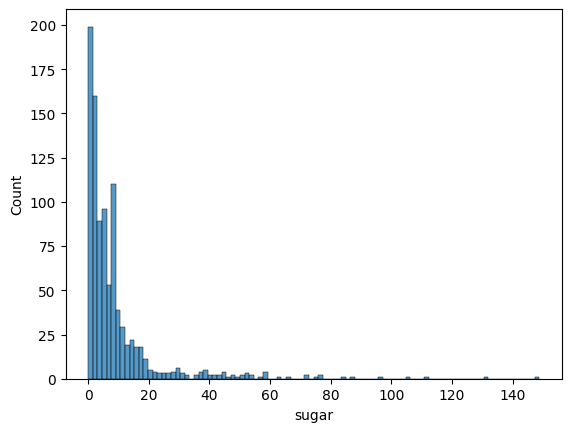

In [22]:
sns.histplot(x='sugar',data=data_c)

In [23]:
data_c.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Low
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Low


What is the relationship between the types of recipe and carbohydrate

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Breakfast'),
  Text(2, 0, 'Chicken'),
  Text(3, 0, 'Dessert'),
  Text(4, 0, 'Lunch/Snacks'),
  Text(5, 0, 'Meat'),
  Text(6, 0, 'One Dish Meal'),
  Text(7, 0, 'Pork'),
  Text(8, 0, 'Potato'),
  Text(9, 0, 'Vegetable')])

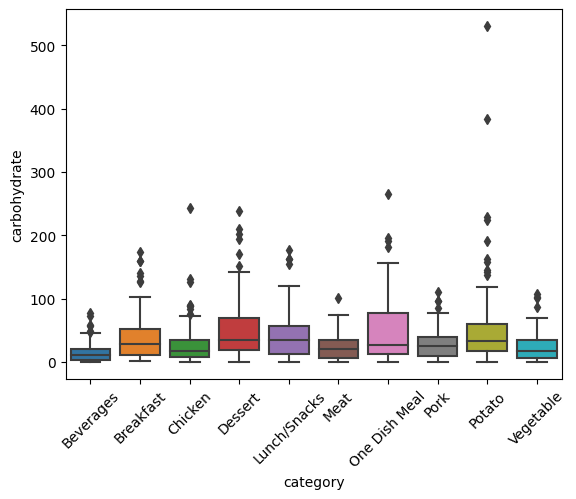

In [24]:
sns.boxplot(x='category',y='carbohydrate',data=data_c)
plt.xticks(rotation = 45)

What is the relationship between the types of recipe and servings

<AxesSubplot: >

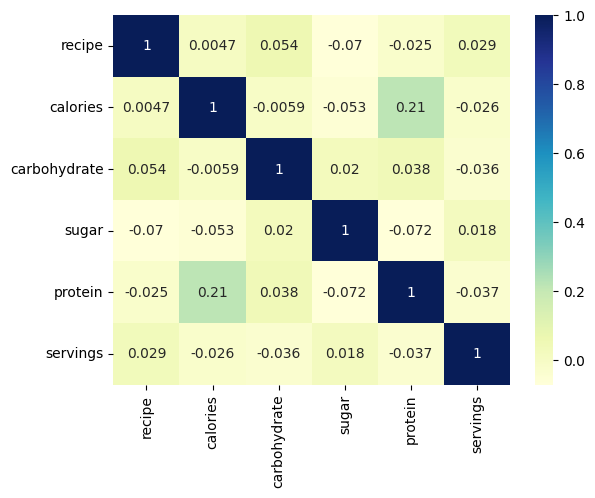

In [25]:
sns.heatmap(data_c.corr(method='spearman'), cmap="YlGnBu", annot=True)

FINDING:
1. The chicken recipe has the most count, followed by the breakfast.
2. The pork recipe contain the highest average calories, followed by meat recipe.
3. Most of the recipe contains 0 - 100 grams of carbohydrate
4. Most of the recipe contains 0 - 100 grams of proteins
5. Most of the recipe contains 0 - 20 grams of sugar
6. For all the recipe types, 50% of them have about the same carbohydrate content. 75% of One dish meal and Dessert contain more.
7. There is no strong correlation between any of the features/columns

# MODEL DEVELOPMENT

## The model will predict if a recipe leads to high traffic or not. It is therefore a classification model. Binary classification model to be precise.

We will use a logistic regression model as a baseline model

In [26]:
#prepare predictor and target datasets

data_prep = pd.get_dummies(data_c.drop('high_traffic', axis=1))
X = data_prep.values

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(data_c['high_traffic'])
y.shape, X.shape

((947,), (947, 16))

In [27]:
#import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [28]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12, stratify=y)
                          
X_train = StandardScaler().fit_transform(X_train_unscaled)
X_test = StandardScaler().fit_transform(X_test_unscaled)

print(X_train.shape, X_test.shape)                                            
print(y_train.shape, y_test.shape)

(757, 16) (190, 16)
(757,) (190,)


In [29]:
model_base = LogisticRegression()

model_base.fit(X_train, y_train)
model_base.score(X_train,y_train)

ypred = model_base.predict(X_test)
print('Logistic model accuracy score: ',accuracy_score(ypred, y_test))

model_cross = cross_val_score(model_base, X, y, cv=9,scoring='accuracy')
print('cross val scores: ', model_cross)

Logistic model accuracy score:  0.7842105263157895
cross val scores:  [0.77358491 0.71698113 0.75238095 0.74285714 0.80952381 0.7047619
 0.82857143 0.78095238 0.76190476]


In [30]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, random_state=12)
model_tree.fit(X_train,y_train)
ypred_T = model_tree.predict(X_test)
print('Tree model accuracy score: ', accuracy_score(y_test,ypred_T))

model_cross_tree = cross_val_score(model_tree, X, y, cv=9,scoring='accuracy')
print('cross val scores: ', model_cross_tree)

Tree model accuracy score:  0.7684210526315789
cross val scores:  [0.70754717 0.69811321 0.77142857 0.72380952 0.80952381 0.7047619
 0.83809524 0.78095238 0.77142857]


In [31]:
prediction_proba = model_base.predict_proba(X_test)[:,1]
prediction_proba = prediction_proba.tolist()

prediction_proba_train = model_base.predict_proba(X_train)[:,1]
prediction_proba_train = prediction_proba_train.tolist()

prediction_proba_combine = prediction_proba + prediction_proba_train

p = np.concatenate([X_train_unscaled,X_test_unscaled])

threshold_df = pd.DataFrame(
{
    'Threshold': prediction_proba_combine,
    'recipe': p[:,0]
})

recipes_to_high_traffic = threshold_df[threshold_df['Threshold']>=0.8]

recipes_to_high_traffic = recipes_to_high_traffic['recipe']

recipes_to_high_traffic


6      243.0
30     848.0
35     192.0
43     132.0
59     678.0
       ...  
909    297.0
914      4.0
927    888.0
933    187.0
942    516.0
Name: recipe, Length: 92, dtype: float64

MODELS PERFORMANCE:
1. Both models perform approximately the same, with best scores from cross validation over 80% accuracy.

1. The business should look at the threshold values in the threshold_df dataframe and pick a threshold(nothing less than 0.5). if the threshold is >  0.5 then it should lead to high_traffic for them.
Additionally, the 'recipes_to_high_traffic' contains recipes that will leads to high-traffic. The business can just focus on that.
3. threshold = 0.5

RECOMMENDATION:
This analysis contains findings(FINDINGS section) from the exploratory analysis of the given dataset, the following are some recommendation for the business to pursue.
1. The model has an accuracy of about 80%. The business should consider deploying the model.
2. The business should endeavour to maintain nutrition distribution to what is included in the FINDINGS section.
3. To reduce chances of showing unpopular recipes, the threshold can be increased from the initial value 0.5 to something higher. it should be noted the higher the threshold, the lower the chance of displaying unpopular recipes.
4. Should new recipes be added, then the threshold_df dataframe can be extended to include the new recipes. This makes selecting the popular recipe with a simple query or table glance.
5. The recipes that will lead to high traffic is contained in 'recipes_to_high_traffic'